In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df = pd.read_csv('NG_22dec.csv')

C:\Users\Bhawit Balodi\AppData\Local\Temp\ipykernel_16220\2437384017.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('NG_22dec.csv')


In [3]:
df.head(5)

,Time/sec,Potential/V,Current/A,Charge/C
0,0.5,3.94214,1.24797,0.00000
1,1.0,3.94504,1.24789,0.81737
2,2.0,3.94806,1.24790,2.16510
3,3.0,3.95068,1.24790,3.33812
4,4.0,3.95281,1.24790,4.67338


In [4]:
df.isnull().sum()

Time/sec       0
Potential/V    0
Current/A      0
Charge/C       0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048571 entries, 0 to 1048570
Data columns (total 4 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Time/sec     1048571 non-null  object 
 1   Potential/V  1048571 non-null  float64
 2   Current/A    1048571 non-null  float64
 3   Charge/C     1048571 non-null  float64
dtypes: float64(3), object(1)
memory usage: 32.0+ MB


In [6]:
df.shape

(1048571, 4)

In [7]:
df.loc[df['Time/sec']=='######.#']  # checking for the string values 

,Time/sec,Potential/V,Current/A,Charge/C
994879,######.#,4.17935,0.00000,2964.880
994880,######.#,4.17936,0.00000,2964.880
994881,######.#,4.17934,0.00000,2964.880
994882,######.#,4.17935,0.00000,2964.880
994883,######.#,4.17934,0.00000,2964.880
...,...,...,...,...
1048566,######.#,3.99802,1.24720,-335.933
1048567,######.#,3.99817,1.24720,-334.761
1048568,######.#,3.99830,1.24719,-333.588
1048569,######.#,3.99844,1.24719,-332.242


In [8]:
df.rename(columns={'Time/sec': 'Time', 'Potential/V': 'Potential','Current/A': 'Current','Charge/C': 'Charge'}, inplace=True)

In [9]:
df.drop(df.index[994879:1048571],axis = 0, inplace = True)   # Removing the #### values 

In [10]:
# df.drop(['Time'], axis=1,inplace=True)  # deleting the Time column

In [11]:
# df['Time'].iloc[994881]

In [12]:
df.shape

(994879, 4)

In [13]:
df.insert(loc=3, column='Capacity', value = df['Charge']/3600)  # Adding the column

In [14]:
df['Time'] = df['Time'].astype(float)  # converting object values to float values

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994879 entries, 0 to 994878
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Time       994879 non-null  float64
 1   Potential  994879 non-null  float64
 2   Current    994879 non-null  float64
 3   Capacity   994879 non-null  float64
 4   Charge     994879 non-null  float64
dtypes: float64(5)
memory usage: 38.0 MB


Text(0.5, 1.0, 'Capacity vs TIme')

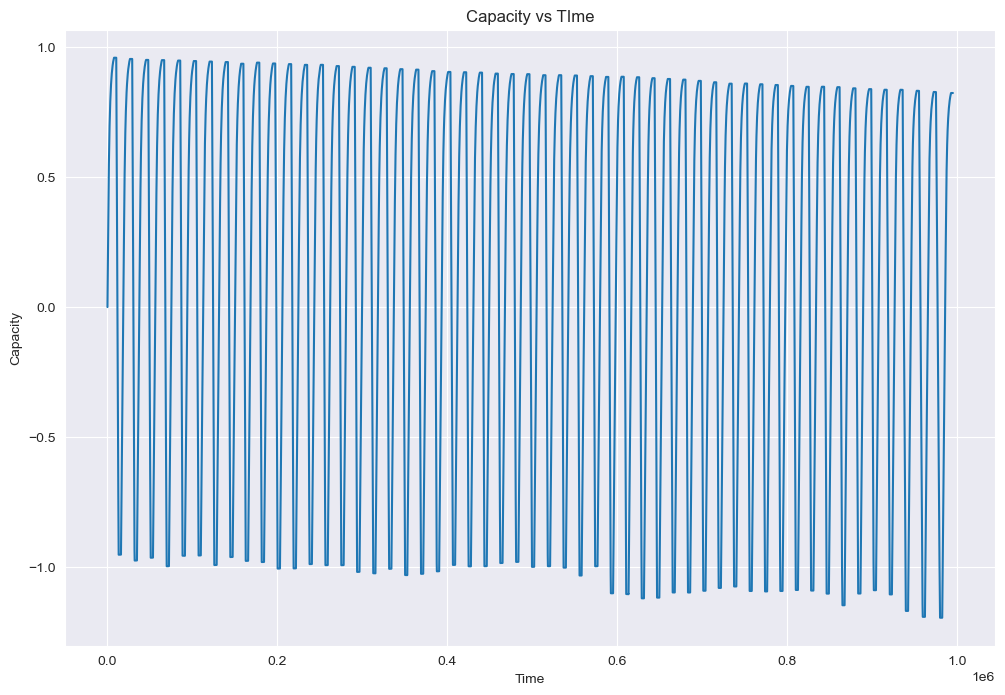

In [16]:
# Capacity Vs Time
sns.set_style("darkgrid")
plt.figure(figsize=(12, 8))
plt.plot(df['Capacity'])
plt.ylabel('Capacity')
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('Time')
plt.title('Capacity vs TIme')

# Data Cleaning

In [17]:
# df.fillna(value=0, inplace=True)

In [18]:
# df.isnull().sum()

In [19]:
# df.info()

# Local Maxima and Minima

CPU times: total: 6min 47s
Wall time: 7min 29s


C:\Users\Bhawit Balodi\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:755: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  return ax.plot(*args, **kwds)
C:\Users\Bhawit Balodi\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:755: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  return ax.plot(*args, **kwds)


Text(0.5, 1.0, 'Local Maxima and Local Minima')

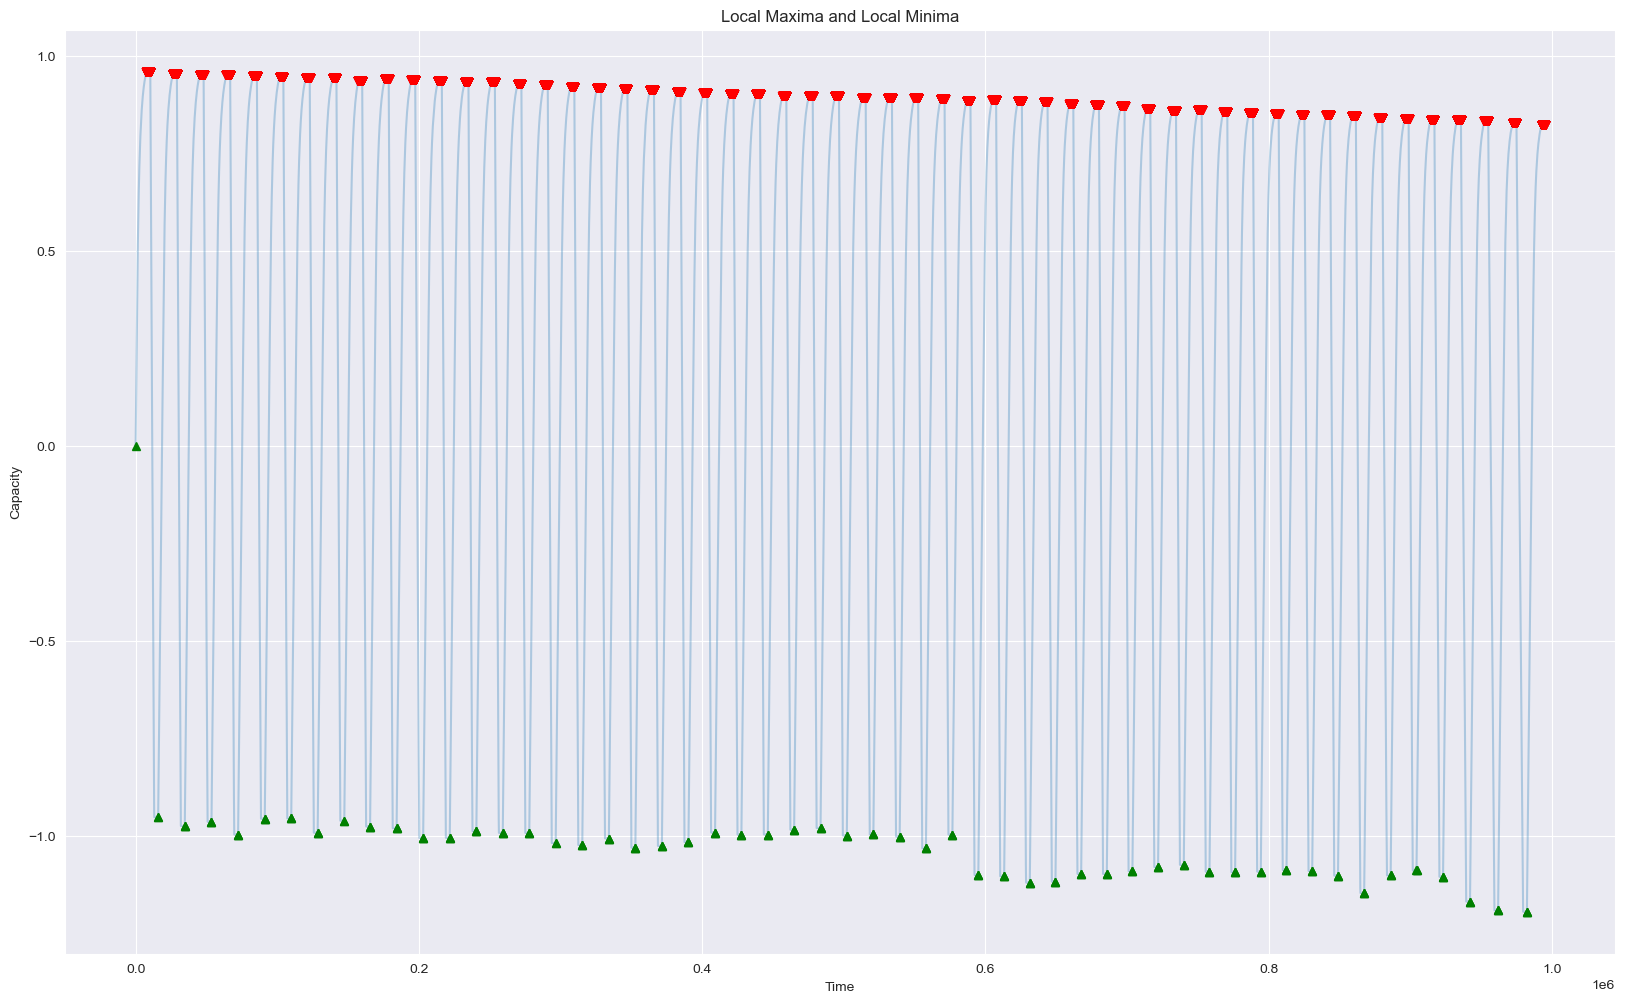

In [20]:
%%time
from scipy.signal import argrelextrema
import numpy as np

ilocs_min = argrelextrema(df.Capacity.values, np.less_equal, order=5000)[0]
ilocs_max = argrelextrema(df.Capacity.values, np.greater_equal, order=5000)[0]

df.Capacity.plot(figsize=(20,12), alpha=.3)
# filter prices that are peaks and plot them differently to be visable on the plot
df.iloc[ilocs_max].Capacity.plot(style='.', lw=1, color='red', marker="v");
df.iloc[ilocs_min].Capacity.plot(style='.', lw=1, color='green', marker="^")
plt.ylabel("Capacity")
plt.xlabel("Time")
plt.title('Local Maxima and Local Minima')

In [21]:
maximum_point = df['Capacity'][ilocs_max].unique()
minimum_point = df['Capacity'][ilocs_min].unique()

In [22]:
print(maximum_point)
print(maximum_point.max())
print(minimum_point)

[0.95931944 0.95455    0.95088889 0.95006389 0.94838889 0.94654722
 0.94444722 0.94270278 0.93617778 0.940475   0.93714722 0.93475278
 0.93185278 0.93199444 0.92716944 0.92424722 0.92075278 0.91866944
 0.91525    0.91343333 0.90770833 0.90459167 0.90346111 0.90203333
 0.89824167 0.896575   0.89607222 0.89202222 0.89213611 0.89085556
 0.88832778 0.88545556 0.88612778 0.8842     0.88057778 0.87751389
 0.87505278 0.87025556 0.8649     0.85945    0.85999167 0.85715833
 0.85434444 0.85090833 0.84737222 0.84766667 0.84604444 0.84154444
 0.83846389 0.83609722 0.83606667 0.83217778 0.82765556 0.82357778]
0.9593194444444445
[ 0.         -0.95302222 -0.97546389 -0.96463333 -0.99741667 -0.95675833
 -0.95597778 -0.99267778 -0.96201111 -0.97678611 -0.98126111 -1.00638611
 -1.00568333 -0.989225   -0.99324167 -0.99336111 -1.01925278 -1.024275
 -1.00729444 -1.03115278 -1.02656667 -1.01694444 -0.99236667 -0.99746111
 -0.99722778 -0.98508056 -0.98075833 -0.99984722 -0.99675556 -1.00235556
 -1.03265833 -

In [23]:
# df.insert(loc = 4,column ='Energy',value=df['Capacity']*df["Potential"]) # do add if needed 

In [24]:
# df.insert(loc = 5,column ='Power',value=df['Current']*df["Potential"])

In [25]:
df.insert(loc=4,column='SOC',value = df['Capacity']/0.96)

In [26]:
df.head(20)

,Time,Potential,Current,Capacity,SOC,Charge
0,0.5,3.94214,1.24797,0.000000,0.000000,0.00000
1,1.0,3.94504,1.24789,0.000227,0.000237,0.81737
2,2.0,3.94806,1.24790,0.000601,0.000626,2.16510
3,3.0,3.95068,1.24790,0.000927,0.000966,3.33812
4,4.0,3.95281,1.24790,0.001298,0.001352,4.67338
5,5.0,3.95467,1.24789,0.001624,0.001692,5.84639
6,6.0,3.95637,1.24791,0.001995,0.002078,7.18165
7,7.0,3.95793,1.24789,0.002321,0.002417,8.35467
8,8.0,3.95938,1.24790,0.002692,0.002804,9.68992
9,9.0,3.96077,1.24789,0.003017,0.003143,10.86290


Text(0.5, 1.0, 'Capacity vs TIme')

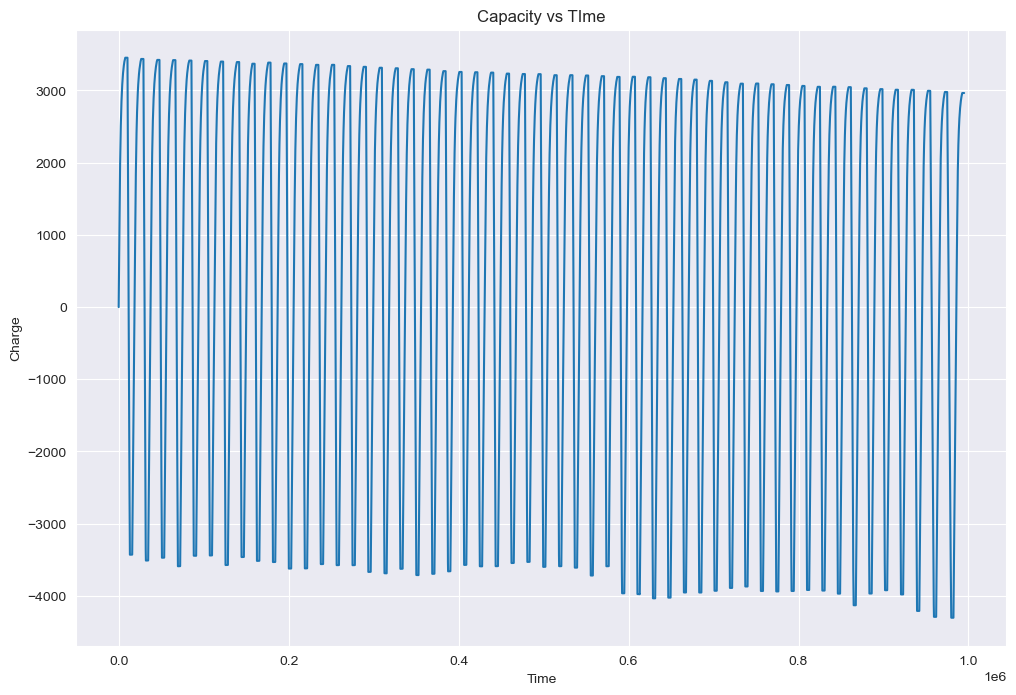

In [27]:
# Capacity Vs Time
sns.set_style("darkgrid")
plt.figure(figsize=(12, 8))
plt.plot(df['Charge'])
plt.ylabel('Charge')
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('Time')
plt.title('Capacity vs TIme')

# Integral current

In [28]:
from scipy.integrate import cumulative_trapezoid

p = df["Time"][:df.shape[0]]
q = df["Current"][:df.shape[0]]

integral = (cumulative_trapezoid(q,p,initial=0))/(3600*0.96)

df.loc[:, "Integral_current"] = integral

Text(0.5, 1.0, 'Dataset')

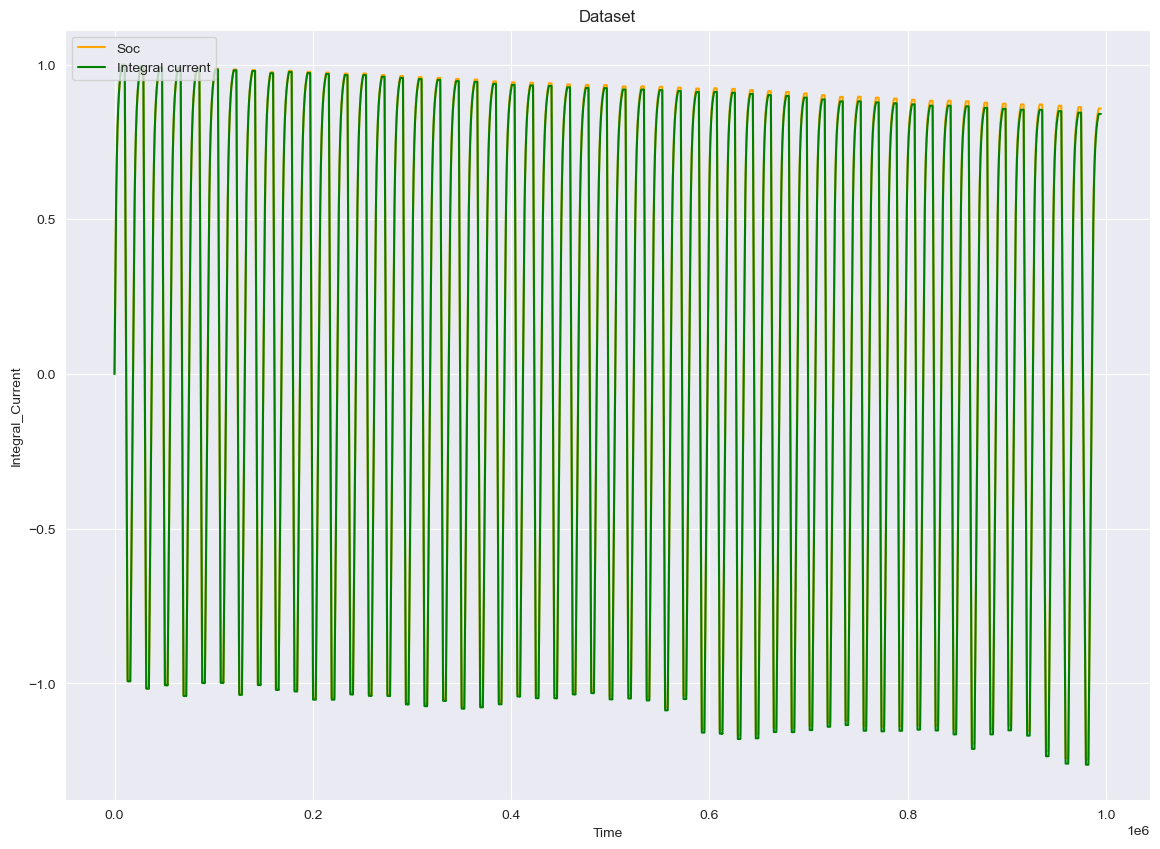

In [29]:
sns.set_style("darkgrid")
plt.figure(figsize=(14, 10))
plt.plot(df['SOC'],color='orange')
plt.plot(df['Integral_current'],color='green')
plt.ylabel('Integral_Current')
plt.xlabel('Time')
plt.legend(["Soc", "Integral current"], loc ="upper left")
plt.title('Dataset')

In [30]:
df.isnull().sum()

Time                0
Potential           0
Current             0
Capacity            0
SOC                 0
Charge              0
Integral_current    0
dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994879 entries, 0 to 994878
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Time              994879 non-null  float64
 1   Potential         994879 non-null  float64
 2   Current           994879 non-null  float64
 3   Capacity          994879 non-null  float64
 4   SOC               994879 non-null  float64
 5   Charge            994879 non-null  float64
 6   Integral_current  994879 non-null  float64
dtypes: float64(7)
memory usage: 53.1 MB


In [32]:
df.describe()

,Time,Potential,Current,Capacity,SOC,Charge,Integral_current
count,994879.000000,994879.000000,994879.000000,994879.000000,994879.000000,994879.000000,994879.000000
mean,501042.738163,3.886127,0.002878,0.146517,0.152622,527.461697,0.142881
std,288767.217690,0.382038,1.142440,0.752569,0.783926,2709.247496,0.784457
min,0.500000,2.750290,-2.503150,-1.195086,-1.244881,-4302.310000,-1.262688
25%,250933.600000,3.475400,0.000000,-0.602635,-0.627745,-2169.485000,-0.637721
50%,501905.600000,4.147310,0.072232,0.455186,0.474152,1638.670000,0.464311
75%,751231.300000,4.199370,0.795196,0.839904,0.874900,3023.655000,0.862360
max,999999.600000,4.199950,1.364510,0.959319,0.999291,3453.550000,0.999371


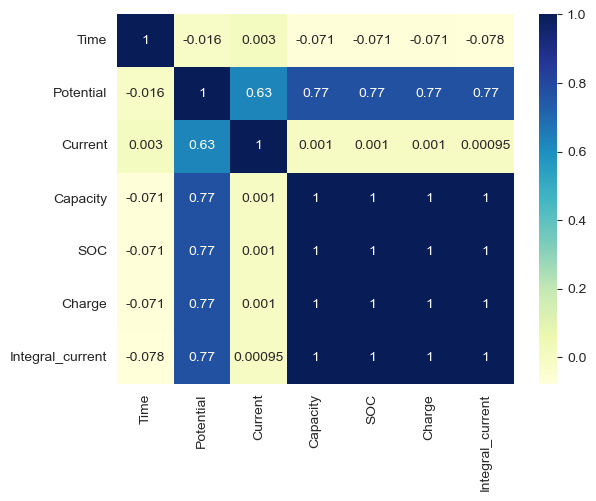

<Figure size 1400x1000 with 0 Axes>

In [33]:
import seaborn as sn
dataplot = sn.heatmap(df.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.figure(figsize = (14,10))
plt.show()

In [34]:
df.head(10)

,Time,Potential,Current,Capacity,SOC,Charge,Integral_current
0,0.5,3.94214,1.24797,0.000000,0.000000,0.00000,0.000000
1,1.0,3.94504,1.24789,0.000227,0.000237,0.81737,0.000181
2,2.0,3.94806,1.24790,0.000601,0.000626,2.16510,0.000542
3,3.0,3.95068,1.24790,0.000927,0.000966,3.33812,0.000903
4,4.0,3.95281,1.24790,0.001298,0.001352,4.67338,0.001264
5,5.0,3.95467,1.24789,0.001624,0.001692,5.84639,0.001625
6,6.0,3.95637,1.24791,0.001995,0.002078,7.18165,0.001986
7,7.0,3.95793,1.24789,0.002321,0.002417,8.35467,0.002347
8,8.0,3.95938,1.24790,0.002692,0.002804,9.68992,0.002708
9,9.0,3.96077,1.24789,0.003017,0.003143,10.86290,0.003069


# Modeling

In [35]:
timest = df.pop('Time')

In [36]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

numericals = ['Potential','Current','Capacity','SOC','Charge','Integral_current'] # Not Normalizing the Y(target Variable) - which is SOC
df[numericals] = scaler.fit_transform(df[numericals])

In [37]:
df.head(10)

,Potential,Current,Capacity,SOC,Charge,Integral_current
0,0.822158,0.969868,0.554717,0.554717,0.554717,0.558203
1,0.824159,0.969847,0.554823,0.554823,0.554823,0.558283
2,0.826242,0.969850,0.554996,0.554996,0.554996,0.558443
3,0.828049,0.969850,0.555148,0.555148,0.555148,0.558602
4,0.829519,0.969850,0.555320,0.555320,0.555320,0.558762
5,0.830802,0.969847,0.555471,0.555471,0.555471,0.558921
6,0.831974,0.969853,0.555643,0.555643,0.555643,0.559081
7,0.833051,0.969847,0.555795,0.555795,0.555795,0.559241
8,0.834051,0.969850,0.555967,0.555967,0.555967,0.559400
9,0.835010,0.969847,0.556118,0.556118,0.556118,0.559560


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994879 entries, 0 to 994878
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Potential         994879 non-null  float64
 1   Current           994879 non-null  float64
 2   Capacity          994879 non-null  float64
 3   SOC               994879 non-null  float64
 4   Charge            994879 non-null  float64
 5   Integral_current  994879 non-null  float64
dtypes: float64(6)
memory usage: 45.5 MB


In [39]:
Y = df.pop('SOC')
X = df

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)

In [41]:
X_train.shape , X_test.shape , Y_train.shape , Y_test.shape

((795903, 5), (198976, 5), (795903,), (198976,))

In [42]:
X_train.head()

,Potential,Current,Capacity,Charge,Integral_current
632683,0.723542,0.969876,0.255141,0.255141,0.255476
57689,0.999600,0.908880,0.768367,0.768367,0.769590
757015,0.486845,0.647200,0.047774,0.047774,0.048557
534265,0.550667,0.000714,0.878952,0.878952,0.875196
369944,0.490929,0.647200,0.078385,0.078385,0.082110


In [43]:
Y_train.head()

632683    0.255141
57689     0.768367
757015    0.047774
534265    0.878952
369944    0.078385
Name: SOC, dtype: float64

In [44]:
def plot_his(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

In [45]:
# # https://stackoverflow.com/questions/44475682/cross-validation-in-deep-neural-networks

# from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
# kf =KFold(n_splits=5, shuffle=True, random_state=42)

# cnt = 1
# # split()  method generate indices to split data into training and test set.
# for train_index, test_index in kf.split(X, Y):
#     print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
#     cnt += 1

In [46]:
from tensorflow.keras.callbacks import EarlyStopping

In [47]:
callback = EarlyStopping(
    monitor = 'val_loss' ,
    min_delta = 0.00001,
    patience = 15,
    verbose = 1,
    mode = 'auto',
    baseline = None,
    restore_best_weights = False
)

In [48]:
X_train.head()

,Potential,Current,Capacity,Charge,Integral_current
632683,0.723542,0.969876,0.255141,0.255141,0.255476
57689,0.999600,0.908880,0.768367,0.768367,0.769590
757015,0.486845,0.647200,0.047774,0.047774,0.048557
534265,0.550667,0.000714,0.878952,0.878952,0.875196
369944,0.490929,0.647200,0.078385,0.078385,0.082110


# Function for the AIC (Akaike information cirteria)

In [49]:
#  Function for the AIC 

import tensorflow as tf
from scipy.stats import norm

# Train your model using TensorFlow
def AIC_value(model,Y_pred,Y_test):

    Y_test = np.asarray(Y_test).astype('float32').reshape((-1,1))
    Y_pred_1 = np.asarray(Y_pred).astype('float32').reshape((-1,1))


    # Calculate the negative log-likelihood of the model's parameters based on the training data
    nll = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=Y_test, logits=Y_pred_1))

    # Calculate the number of parameters in the model
    num_params = model.count_params()

    # Calculate the AIC value for the model
    aic = 2 * num_params - 2 * nll

    # Print the AIC value
    print("AIC: ", aic.numpy())

In [50]:
%%time
import tensorflow as tf
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([tf.keras.layers.Dense(70,activation = 'linear'),
                               tf.keras.layers.Dense(50, activation = 'relu'),
                               tf.keras.layers.Dense(20),
                               tf.keras.layers.Dense(1)])

model_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_1 = model_1.fit(X_train,Y_train, epochs= 100,batch_size=128,validation_data=(X_test,Y_test), callbacks = callback)

Epoch 1/100
6218/6218 [==============================] - 19s 3ms/step - loss: 0.0042 - rmse: 0.0212 - mae: 0.0042 - mse: 4.4836e-04 - mape: 622.7803 - val_loss: 0.0018 - val_rmse: 0.0019 - val_mae: 0.0018 - val_mse: 3.7781e-06 - val_mape: 162.0244
Epoch 2/100
6218/6218 [==============================] - 18s 3ms/step - loss: 0.0015 - rmse: 0.0021 - mae: 0.0015 - mse: 4.3046e-06 - mape: 258.7624 - val_loss: 5.2883e-04 - val_rmse: 6.2923e-04 - val_mae: 5.2883e-04 - val_mse: 3.9593e-07 - val_mape: 317.6386
Epoch 3/100
6218/6218 [==============================] - 17s 3ms/step - loss: 0.0011 - rmse: 0.0014 - mae: 0.0011 - mse: 2.0496e-06 - mape: 180.1136 - val_loss: 0.0012 - val_rmse: 0.0012 - val_mae: 0.0012 - val_mse: 1.5505e-06 - val_mape: 296.3012
Epoch 4/100
6218/6218 [==============================] - 17s 3ms/step - loss: 8.8297e-04 - rmse: 0.0012 - mae: 8.8297e-04 - mse: 1.3320e-06 - mape: 143.3384 - val_loss: 3.6527e-04 - val_rmse: 4.6949e-04 - val_mae: 3.6527e-04 - val_mse: 2.2042e-

6218/6218 [==============================] - 18s 3ms/step - loss: 1.4614e-04 - rmse: 1.9284e-04 - mae: 1.4614e-04 - mse: 3.7186e-08 - mape: 25.1353 - val_loss: 1.2632e-04 - val_rmse: 1.4528e-04 - val_mae: 1.2632e-04 - val_mse: 2.1107e-08 - val_mape: 14.4208
Epoch 32/100
6218/6218 [==============================] - 18s 3ms/step - loss: 1.4667e-04 - rmse: 1.9219e-04 - mae: 1.4667e-04 - mse: 3.6936e-08 - mape: 26.1668 - val_loss: 1.1311e-04 - val_rmse: 1.2501e-04 - val_mae: 1.1311e-04 - val_mse: 1.5627e-08 - val_mape: 12.7745
Epoch 33/100
6218/6218 [==============================] - 17s 3ms/step - loss: 1.3607e-04 - rmse: 1.7724e-04 - mae: 1.3607e-04 - mse: 3.1414e-08 - mape: 23.7779 - val_loss: 5.0709e-05 - val_rmse: 6.4115e-05 - val_mae: 5.0709e-05 - val_mse: 4.1108e-09 - val_mape: 15.5488
Epoch 34/100
6218/6218 [==============================] - 17s 3ms/step - loss: 1.3888e-04 - rmse: 1.8321e-04 - mae: 1.3888e-04 - mse: 3.3567e-08 - mape: 23.9568 - val_loss: 1.6066e-04 - val_rmse: 1.70

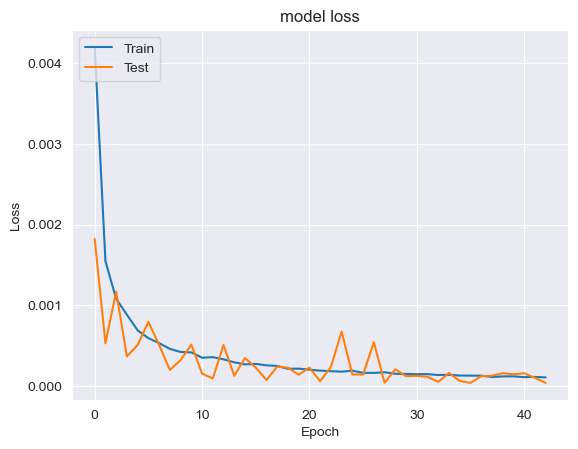

In [51]:
plot_his(history_1)

In [52]:
model_1.evaluate(X_test,Y_test)

6218/6218 [==============================] - 13s 2ms/step - loss: 3.7933e-05 - rmse: 5.0151e-05 - mae: 3.7933e-05 - mse: 2.5151e-09 - mape: 14.5643


[3.793304131249897e-05,
 5.015052011003718e-05,
 3.793304131249897e-05,
 2.515074593034683e-09,
 14.564286231994629]

In [53]:
Y_pred_1 = model_1.predict(X_test)

6218/6218 [==============================] - 9s 1ms/step


In [54]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 70)                420       
                                                                 
 dense_1 (Dense)             (None, 50)                3550      
                                                                 
 dense_2 (Dense)             (None, 20)                1020      
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 5,011
Trainable params: 5,011
Non-trainable params: 0
_________________________________________________________________


In [55]:
AIC_value(model_1,Y_pred_1,Y_test)

AIC:  10020.887


In [56]:
# # AIC 1

# import tensorflow as tf
# from scipy.stats import norm

# # Train your model using TensorFlow
# model = model_1

# Y_test = np.asarray(Y_test).astype('float32').reshape((-1,1))
# Y_pred_1 = np.asarray(Y_pred_1).astype('float32').reshape((-1,1))


# # Calculate the negative log-likelihood of the model's parameters based on the training data
# nll = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=Y_test, logits=Y_pred_1))

# # Calculate the number of parameters in the model
# num_params = model_1.count_params()

# # Calculate the AIC value for the model
# aic = 2 * num_params - 2 * nll

# # Print the AIC value
# print("AIC: ", aic.numpy())

In [57]:
# # AIC 2
# # Get the model's maximum likelihood estimate of the parameters
# params = model_1.get_weights()[0]

# # Calculate the negative log-likelihood of the model's parameters based on the training data
# nll = -np.sum(Y_train * np.log(model_1.predict(X_train)) + (1 - Y_train) * np.log(1 - model_1.predict(X_train)))

# # Calculate the number of parameters in the model
# num_params = len(params)

# # Calculate the AIC value for the model
# aic = 2 * num_params - 2 * nll

# # Print the AIC value
# print("AIC: ", aic)





'''
Showing the error : MemoryError: Unable to allocate 4.61 TiB for an array with shape (795903, 795903) and data type float64
'''

'\nShowing the error : MemoryError: Unable to allocate 4.61 TiB for an array with shape (795903, 795903) and data type float64\n'

# Function for the BIC (Baysian information criteria)

In [58]:
# # BIC
# log_likelihood = np.sum(np.log(Y_pred_1) * Y_test)

# # Calculate the BIC
# n = len(X_test)
# k = model_1.count_params()
# bic = -2 * log_likelihood + k * np.log(n)
# print(bic)

# Model 2

In [59]:
%%time
import tensorflow as tf
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([tf.keras.layers.Dense(100),
                               tf.keras.layers.Dense(50),
                               tf.keras.layers.Dense(1)])

model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_2 = model_2.fit(X_train,Y_train, epochs= 100,validation_data=(X_test,Y_test), callbacks = callback)

Epoch 1/100
24872/24872 [==============================] - 68s 3ms/step - loss: 0.0017 - rmse: 0.0052 - mae: 0.0017 - mse: 2.7028e-05 - mape: 271.7351 - val_loss: 2.6329e-04 - val_rmse: 3.0218e-04 - val_mae: 2.6329e-04 - val_mse: 9.1314e-08 - val_mape: 31.1490
Epoch 2/100
24872/24872 [==============================] - 67s 3ms/step - loss: 3.3930e-04 - rmse: 4.5187e-04 - mae: 3.3930e-04 - mse: 2.0419e-07 - mape: 46.0205 - val_loss: 1.2253e-04 - val_rmse: 1.3530e-04 - val_mae: 1.2253e-04 - val_mse: 1.8307e-08 - val_mape: 19.4017
Epoch 3/100
24872/24872 [==============================] - 65s 3ms/step - loss: 2.2047e-04 - rmse: 2.9146e-04 - mae: 2.2047e-04 - mse: 8.4950e-08 - mape: 27.8159 - val_loss: 1.0384e-04 - val_rmse: 1.1123e-04 - val_mae: 1.0384e-04 - val_mse: 1.2371e-08 - val_mape: 18.6202
Epoch 4/100
24872/24872 [==============================] - 67s 3ms/step - loss: 1.5866e-04 - rmse: 2.1028e-04 - mae: 1.5866e-04 - mse: 4.4219e-08 - mape: 20.3913 - val_loss: 6.1701e-05 - val_rmse

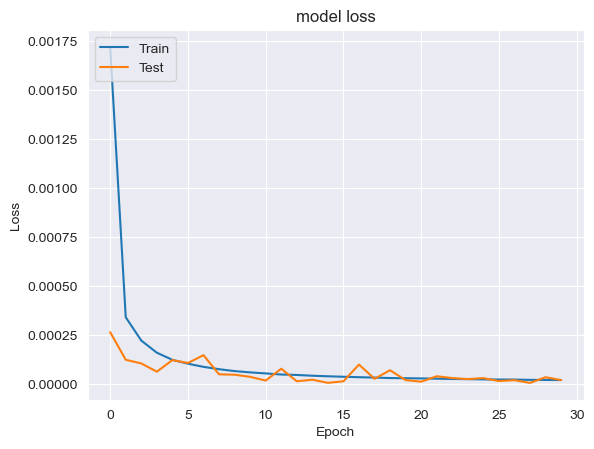

In [60]:
plot_his(history_2)

In [61]:
model_2.evaluate(X_test,Y_test)

6218/6218 [==============================] - 12s 2ms/step - loss: 1.8902e-05 - rmse: 2.0710e-05 - mae: 1.8902e-05 - mse: 4.2892e-10 - mape: 3.8980


[1.8902201190940104e-05,
 2.0710285753011703e-05,
 1.8902201190940104e-05,
 4.289159305503887e-10,
 3.8980488777160645]

In [62]:
Y_pred_2 = model_2.predict(X_test)

6218/6218 [==============================] - 9s 1ms/step


In [63]:
AIC_value(model_2,Y_pred_2,Y_test)

AIC:  11400.887


# Model 3

In [64]:
%%time
import tensorflow as tf
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([tf.keras.layers.Dense(70),
                               tf.keras.layers.Dense(50),
                               tf.keras.layers.Dense(10,activation = 'relu'),
                               tf.keras.layers.Dense(1)])

model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_3 = model_3.fit(X_train,Y_train, epochs= 100,validation_data=(X_test,Y_test), callbacks = callback)

Epoch 1/100
24872/24872 [==============================] - 71s 3ms/step - loss: 0.0023 - rmse: 0.0114 - mae: 0.0023 - mse: 1.3089e-04 - mape: 422.2530 - val_loss: 0.0017 - val_rmse: 0.0017 - val_mae: 0.0017 - val_mse: 2.8812e-06 - val_mape: 200.3918
Epoch 2/100
24872/24872 [==============================] - 68s 3ms/step - loss: 7.3391e-04 - rmse: 9.9141e-04 - mae: 7.3391e-04 - mse: 9.8290e-07 - mape: 133.9102 - val_loss: 1.7854e-04 - val_rmse: 2.1317e-04 - val_mae: 1.7854e-04 - val_mse: 4.5440e-08 - val_mape: 23.5149
Epoch 3/100
24872/24872 [==============================] - 67s 3ms/step - loss: 4.9685e-04 - rmse: 6.6628e-04 - mae: 4.9685e-04 - mse: 4.4393e-07 - mape: 84.5702 - val_loss: 1.6628e-04 - val_rmse: 1.9298e-04 - val_mae: 1.6628e-04 - val_mse: 3.7243e-08 - val_mape: 62.2647
Epoch 4/100
24872/24872 [==============================] - 69s 3ms/step - loss: 3.6734e-04 - rmse: 4.8927e-04 - mae: 3.6734e-04 - mse: 2.3938e-07 - mape: 56.3580 - val_loss: 2.4935e-04 - val_rmse: 2.6230e-

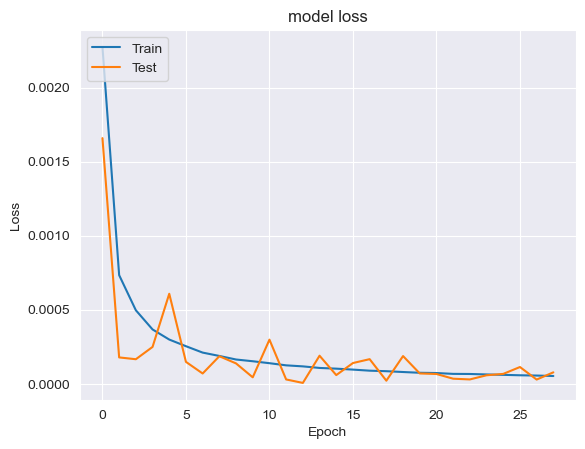

In [65]:
plot_his(history_3)

In [66]:
model_3.evaluate(X_test,Y_test)

6218/6218 [==============================] - 12s 2ms/step - loss: 7.7848e-05 - rmse: 8.2148e-05 - mae: 7.7848e-05 - mse: 6.7482e-09 - mape: 6.5383


[7.784795889165252e-05,
 8.214754052460194e-05,
 7.784795889165252e-05,
 6.748218872587586e-09,
 6.538344383239746]

In [67]:
Y_pred_3 = model_3.predict(X_test)

6218/6218 [==============================] - 9s 1ms/step


In [68]:
AIC_value(model_3,Y_pred_3,Y_test)

AIC:  8980.887


# Model 4

In [69]:
%%time
import tensorflow as tf
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([tf.keras.layers.Dense(200),
                               tf.keras.layers.Dense(50),
                               tf.keras.layers.Dense(10,activation = 'relu'),
                               tf.keras.layers.Dense(1)])

model_4.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_4 = model_4.fit(X_train,Y_train, epochs= 100,validation_data=(X_test,Y_test), callbacks = callback)

Epoch 1/100
24872/24872 [==============================] - 72s 3ms/step - loss: 0.0013 - rmse: 0.0061 - mae: 0.0013 - mse: 3.6759e-05 - mape: 160.0414 - val_loss: 4.9144e-04 - val_rmse: 5.1780e-04 - val_mae: 4.9144e-04 - val_mse: 2.6811e-07 - val_mape: 125.2697
Epoch 2/100
24872/24872 [==============================] - 70s 3ms/step - loss: 2.6456e-04 - rmse: 3.5128e-04 - mae: 2.6456e-04 - mse: 1.2340e-07 - mape: 33.3375 - val_loss: 1.4540e-04 - val_rmse: 1.7385e-04 - val_mae: 1.4540e-04 - val_mse: 3.0223e-08 - val_mape: 7.1148
Epoch 3/100
24872/24872 [==============================] - 68s 3ms/step - loss: 1.6376e-04 - rmse: 2.1687e-04 - mae: 1.6376e-04 - mse: 4.7035e-08 - mape: 20.9731 - val_loss: 3.4703e-05 - val_rmse: 3.9213e-05 - val_mae: 3.4703e-05 - val_mse: 1.5376e-09 - val_mape: 3.0190
Epoch 4/100
24872/24872 [==============================] - 70s 3ms/step - loss: 1.1851e-04 - rmse: 1.5591e-04 - mae: 1.1851e-04 - mse: 2.4307e-08 - mape: 15.4579 - val_loss: 1.7327e-04 - val_rmse:

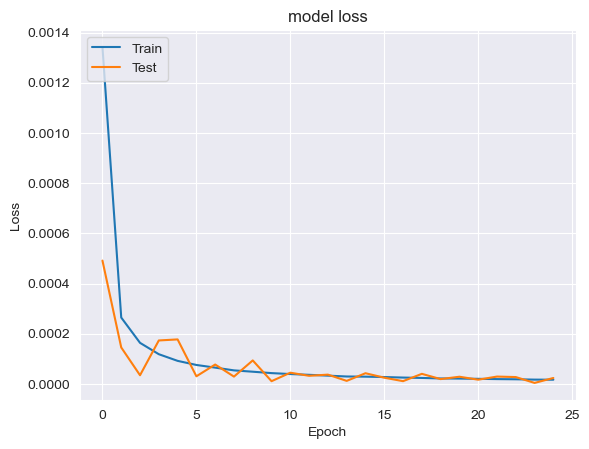

In [70]:
plot_his(history_4)

In [71]:
model_4.evaluate(X_test,Y_test)

6218/6218 [==============================] - 12s 2ms/step - loss: 2.3792e-05 - rmse: 2.4951e-05 - mae: 2.3792e-05 - mse: 6.2256e-10 - mape: 2.1574


[2.3792434149072506e-05,
 2.495110129530076e-05,
 2.3792434149072506e-05,
 6.225574500362541e-10,
 2.157392978668213]

In [72]:
Y_pred_4 = model_4.predict(X_test)

6218/6218 [==============================] - 10s 2ms/step


In [73]:
AIC_value(model_4,Y_pred_4,Y_test)

AIC:  23540.887


# LSTM


# Model 5

In [74]:
%%time
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([tf.keras.layers.LSTM(50,activation= 'relu',return_sequences=True, input_shape=(5,1)),
                               tf.keras.layers.LSTM(10,activation='relu'),
                               tf.keras.layers.Dense(1)])

model_5.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_5 = model_5.fit(X_train,Y_train,epochs=50,validation_data=(X_test,Y_test),callbacks = callback)

Epoch 1/50
24872/24872 [==============================] - 182s 7ms/step - loss: 0.0037 - rmse: 0.0225 - mae: 0.0037 - mse: 5.0838e-04 - mape: 1531.5225 - val_loss: 9.4371e-04 - val_rmse: 0.0014 - val_mae: 9.4371e-04 - val_mse: 1.8561e-06 - val_mape: 206.6918
Epoch 2/50
24872/24872 [==============================] - 181s 7ms/step - loss: 9.8076e-04 - rmse: 0.0013 - mae: 9.8076e-04 - mse: 1.7628e-06 - mape: 270.4745 - val_loss: 7.4182e-04 - val_rmse: 9.6517e-04 - val_mae: 7.4182e-04 - val_mse: 9.3156e-07 - val_mape: 284.6680
Epoch 3/50
24872/24872 [==============================] - 178s 7ms/step - loss: 6.9335e-04 - rmse: 9.3805e-04 - mae: 6.9335e-04 - mse: 8.7993e-07 - mape: 237.2201 - val_loss: 4.9298e-04 - val_rmse: 7.0284e-04 - val_mae: 4.9298e-04 - val_mse: 4.9398e-07 - val_mape: 146.7133
Epoch 4/50
24872/24872 [==============================] - 180s 7ms/step - loss: 5.7563e-04 - rmse: 7.7565e-04 - mae: 5.7563e-04 - mse: 6.0163e-07 - mape: 216.0575 - val_loss: 5.7716e-04 - val_rmse:

Epoch 31/50
24872/24872 [==============================] - 175s 7ms/step - loss: 3.4221e-04 - rmse: 4.7827e-04 - mae: 3.4221e-04 - mse: 2.2874e-07 - mape: 119.8242 - val_loss: 3.6645e-04 - val_rmse: 4.9831e-04 - val_mae: 3.6645e-04 - val_mse: 2.4831e-07 - val_mape: 85.1452
Epoch 32/50
24872/24872 [==============================] - 173s 7ms/step - loss: 3.4030e-04 - rmse: 4.7609e-04 - mae: 3.4030e-04 - mse: 2.2666e-07 - mape: 119.6465 - val_loss: 3.1783e-04 - val_rmse: 4.5508e-04 - val_mae: 3.1783e-04 - val_mse: 2.0710e-07 - val_mape: 103.9210
Epoch 33/50
24872/24872 [==============================] - 182s 7ms/step - loss: 3.3870e-04 - rmse: 4.7423e-04 - mae: 3.3870e-04 - mse: 2.2489e-07 - mape: 118.8869 - val_loss: 3.2190e-04 - val_rmse: 4.6549e-04 - val_mae: 3.2190e-04 - val_mse: 2.1668e-07 - val_mape: 131.3789
Epoch 34/50
24872/24872 [==============================] - 181s 7ms/step - loss: 3.3683e-04 - rmse: 4.7234e-04 - mae: 3.3683e-04 - mse: 2.2310e-07 - mape: 118.9851 - val_loss: 

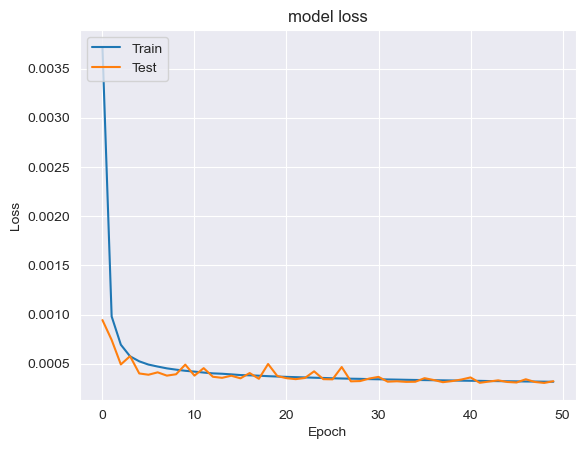

In [75]:
plot_his(history_5)

In [76]:
model_5.evaluate(X_test,Y_test)

6218/6218 [==============================] - 21s 3ms/step - loss: 3.2254e-04 - rmse: 4.5290e-04 - mae: 3.2254e-04 - mse: 2.0512e-07 - mape: 110.2868


[0.0003225359250791371,
 0.0004528968711383641,
 0.0003225359250791371,
 2.0511558318503376e-07,
 110.28679656982422]

In [77]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 50)             10400     
                                                                 
 lstm_1 (LSTM)               (None, 10)                2440      
                                                                 
 dense_15 (Dense)            (None, 1)                 11        
                                                                 
Total params: 12,851
Trainable params: 12,851
Non-trainable params: 0
_________________________________________________________________


In [78]:
prediction_5 = model_5.predict(X_test)

6218/6218 [==============================] - 19s 3ms/step


In [79]:
AIC_value(model_5,prediction_5,Y_test)

AIC:  25700.887


In [80]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 50)             10400     
                                                                 
 lstm_1 (LSTM)               (None, 10)                2440      
                                                                 
 dense_15 (Dense)            (None, 1)                 11        
                                                                 
Total params: 12,851
Trainable params: 12,851
Non-trainable params: 0
_________________________________________________________________


# Model 6

In [81]:
%%time
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([tf.keras.layers.LSTM(70,activation= 'relu',return_sequences=True, input_shape=(5,1)),
                               tf.keras.layers.LSTM(30,activation= 'relu'),
                               tf.keras.layers.Dense(20,activation='relu'),
                               tf.keras.layers.Dense(1,activation='linear')])

model_6.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay = 0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_6 = model_6.fit(X_train,Y_train,epochs=40,validation_data=(X_test,Y_test))

Epoch 1/40
24872/24872 [==============================] - 219s 8ms/step - loss: 0.0040 - rmse: 0.0235 - mae: 0.0040 - mse: 5.5226e-04 - mape: 1243.9220 - val_loss: 0.0010 - val_rmse: 0.0012 - val_mae: 0.0010 - val_mse: 1.5390e-06 - val_mape: 308.0120
Epoch 2/40
24872/24872 [==============================] - 212s 9ms/step - loss: 0.0010 - rmse: 0.0014 - mae: 0.0010 - mse: 1.8921e-06 - mape: 214.5054 - val_loss: 0.0011 - val_rmse: 0.0012 - val_mae: 0.0011 - val_mse: 1.5086e-06 - val_mape: 57.8222
Epoch 3/40
24872/24872 [==============================] - 222s 9ms/step - loss: 6.7242e-04 - rmse: 9.2530e-04 - mae: 6.7242e-04 - mse: 8.5618e-07 - mape: 165.8113 - val_loss: 7.2586e-04 - val_rmse: 8.7047e-04 - val_mae: 7.2586e-04 - val_mse: 7.5771e-07 - val_mape: 50.1016
Epoch 4/40
24872/24872 [==============================] - 233s 9ms/step - loss: 5.3575e-04 - rmse: 7.3376e-04 - mae: 5.3575e-04 - mse: 5.3840e-07 - mape: 148.2622 - val_loss: 4.0486e-04 - val_rmse: 5.7133e-04 - val_mae: 4.0486e

24872/24872 [==============================] - 200s 8ms/step - loss: 2.5725e-04 - rmse: 3.6615e-04 - mae: 2.5725e-04 - mse: 1.3407e-07 - mape: 53.0010 - val_loss: 2.5053e-04 - val_rmse: 3.7421e-04 - val_mae: 2.5053e-04 - val_mse: 1.4003e-07 - val_mape: 54.8271
Epoch 32/40
24872/24872 [==============================] - 196s 8ms/step - loss: 2.5420e-04 - rmse: 3.6310e-04 - mae: 2.5420e-04 - mse: 1.3184e-07 - mape: 52.9764 - val_loss: 2.4443e-04 - val_rmse: 3.5540e-04 - val_mae: 2.4443e-04 - val_mse: 1.2631e-07 - val_mape: 51.8399
Epoch 33/40
24872/24872 [==============================] - 196s 8ms/step - loss: 2.5320e-04 - rmse: 3.6165e-04 - mae: 2.5320e-04 - mse: 1.3079e-07 - mape: 52.1102 - val_loss: 3.2813e-04 - val_rmse: 4.2382e-04 - val_mae: 3.2813e-04 - val_mse: 1.7962e-07 - val_mape: 33.5232
Epoch 34/40
24872/24872 [==============================] - 197s 8ms/step - loss: 2.5078e-04 - rmse: 3.5956e-04 - mae: 2.5078e-04 - mse: 1.2928e-07 - mape: 52.4235 - val_loss: 2.4027e-04 - val_r

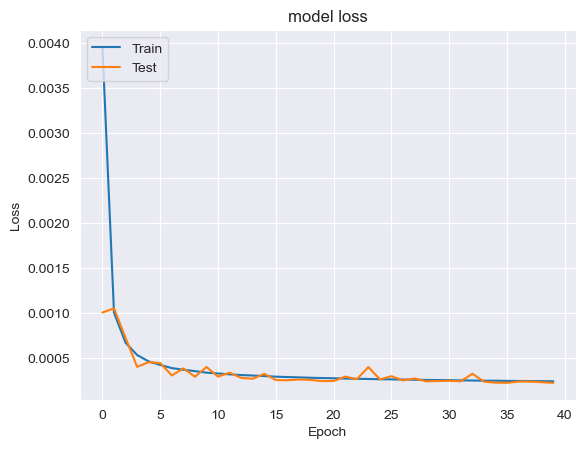

In [82]:
plot_his(history_6)

In [83]:
model_6.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 5, 70)             20160     
                                                                 
 lstm_3 (LSTM)               (None, 30)                12120     
                                                                 
 dense_16 (Dense)            (None, 20)                620       
                                                                 
 dense_17 (Dense)            (None, 1)                 21        
                                                                 
Total params: 32,921
Trainable params: 32,921
Non-trainable params: 0
_________________________________________________________________


In [84]:
model_6.evaluate(X_test,Y_test)

6218/6218 [==============================] - 23s 4ms/step - loss: 2.2625e-04 - rmse: 3.4158e-04 - mae: 2.2625e-04 - mse: 1.1668e-07 - mape: 28.0566


[0.00022624536359217018,
 0.0003415849932935089,
 0.00022624536359217018,
 1.1668030452938183e-07,
 28.056612014770508]

In [85]:
prediction_6 = model_6.predict(X_test)

6218/6218 [==============================] - 21s 3ms/step


In [86]:
AIC_value(model_6,prediction_6,Y_test)

AIC:  65840.89


In [87]:
model_6.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 5, 70)             20160     
                                                                 
 lstm_3 (LSTM)               (None, 30)                12120     
                                                                 
 dense_16 (Dense)            (None, 20)                620       
                                                                 
 dense_17 (Dense)            (None, 1)                 21        
                                                                 
Total params: 32,921
Trainable params: 32,921
Non-trainable params: 0
_________________________________________________________________


# Model 7

In [88]:
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([tf.keras.layers.LSTM(30,activation= 'linear',return_sequences=True, input_shape=(5,1)),
                               tf.keras.layers.LSTM(10,activation='relu'),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)])

model_7.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_7 = model_7.fit(X_train,Y_train,batch_size = 128,epochs=70,validation_data=(X_test,Y_test),callbacks = callback)

Epoch 1/70
6218/6218 [==============================] - 53s 8ms/step - loss: 0.0133 - rmse: 0.0461 - mae: 0.0133 - mse: 0.0021 - mape: 4743.8560 - val_loss: 0.0034 - val_rmse: 0.0040 - val_mae: 0.0034 - val_mse: 1.5870e-05 - val_mape: 512.2495
Epoch 2/70
6218/6218 [==============================] - 48s 8ms/step - loss: 0.0030 - rmse: 0.0039 - mae: 0.0030 - mse: 1.5303e-05 - mape: 804.6733 - val_loss: 0.0021 - val_rmse: 0.0027 - val_mae: 0.0021 - val_mse: 7.2705e-06 - val_mape: 392.2989
Epoch 3/70
6218/6218 [==============================] - 48s 8ms/step - loss: 0.0021 - rmse: 0.0027 - mae: 0.0021 - mse: 7.2438e-06 - mape: 561.6551 - val_loss: 0.0016 - val_rmse: 0.0021 - val_mae: 0.0016 - val_mse: 4.5708e-06 - val_mape: 305.6598
Epoch 4/70
6218/6218 [==============================] - 48s 8ms/step - loss: 0.0017 - rmse: 0.0022 - mae: 0.0017 - mse: 4.8802e-06 - mape: 466.2562 - val_loss: 0.0022 - val_rmse: 0.0026 - val_mae: 0.0022 - val_mse: 6.8160e-06 - val_mape: 427.6196
Epoch 5/70
6218

6218/6218 [==============================] - 48s 8ms/step - loss: 5.4564e-04 - rmse: 7.2237e-04 - mae: 5.4564e-04 - mse: 5.2182e-07 - mape: 92.6081 - val_loss: 5.4653e-04 - val_rmse: 6.9405e-04 - val_mae: 5.4653e-04 - val_mse: 4.8171e-07 - val_mape: 37.1038
Epoch 33/70
6218/6218 [==============================] - 47s 8ms/step - loss: 5.3882e-04 - rmse: 7.1413e-04 - mae: 5.3882e-04 - mse: 5.0998e-07 - mape: 89.6900 - val_loss: 6.8330e-04 - val_rmse: 8.1340e-04 - val_mae: 6.8330e-04 - val_mse: 6.6162e-07 - val_mape: 16.3896
Epoch 34/70
6218/6218 [==============================] - 49s 8ms/step - loss: 5.3145e-04 - rmse: 7.0502e-04 - mae: 5.3145e-04 - mse: 4.9706e-07 - mape: 91.1062 - val_loss: 4.9133e-04 - val_rmse: 6.6641e-04 - val_mae: 4.9133e-04 - val_mse: 4.4410e-07 - val_mape: 61.1506
Epoch 35/70
6218/6218 [==============================] - 48s 8ms/step - loss: 5.2665e-04 - rmse: 6.9879e-04 - mae: 5.2665e-04 - mse: 4.8831e-07 - mape: 94.2974 - val_loss: 5.1227e-04 - val_rmse: 6.8938e

6218/6218 [==============================] - 51s 8ms/step - loss: 4.1572e-04 - rmse: 5.4188e-04 - mae: 4.1572e-04 - mse: 2.9363e-07 - mape: 126.4991 - val_loss: 4.0753e-04 - val_rmse: 5.3023e-04 - val_mae: 4.0753e-04 - val_mse: 2.8114e-07 - val_mape: 139.4043
Epoch 63/70
6218/6218 [==============================] - 49s 8ms/step - loss: 4.1164e-04 - rmse: 5.3709e-04 - mae: 4.1164e-04 - mse: 2.8846e-07 - mape: 129.4699 - val_loss: 4.0421e-04 - val_rmse: 5.3755e-04 - val_mae: 4.0421e-04 - val_mse: 2.8896e-07 - val_mape: 79.6713
Epoch 64/70
6218/6218 [==============================] - 48s 8ms/step - loss: 4.1121e-04 - rmse: 5.3558e-04 - mae: 4.1121e-04 - mse: 2.8685e-07 - mape: 131.5075 - val_loss: 3.9189e-04 - val_rmse: 5.1310e-04 - val_mae: 3.9189e-04 - val_mse: 2.6327e-07 - val_mape: 103.4276
Epoch 65/70
6218/6218 [==============================] - 49s 8ms/step - loss: 4.0754e-04 - rmse: 5.3159e-04 - mae: 4.0754e-04 - mse: 2.8258e-07 - mape: 132.7446 - val_loss: 4.1018e-04 - val_rmse: 5

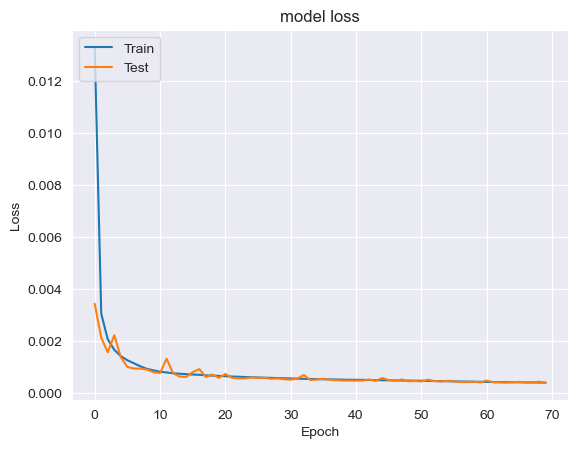

In [89]:
plot_his(history_7)

In [90]:
prediction_7 = model_7.predict(X_test)

6218/6218 [==============================] - 17s 3ms/step


In [91]:
model_7.evaluate(X_test,Y_test)

6218/6218 [==============================] - 22s 3ms/step - loss: 3.8092e-04 - rmse: 5.0889e-04 - mae: 3.8092e-04 - mse: 2.5897e-07 - mape: 86.6127


[0.00038092234171926975,
 0.0005088889156468213,
 0.00038092234171926975,
 2.589679297670955e-07,
 86.61267852783203]

In [92]:
AIC_value(model_7,prediction_7,Y_test)

AIC:  11200.887


In [93]:
model_7.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 5, 30)             3840      
                                                                 
 lstm_5 (LSTM)               (None, 10)                1640      
                                                                 
 dense_18 (Dense)            (None, 10)                110       
                                                                 
 dense_19 (Dense)            (None, 1)                 11        
                                                                 
Total params: 5,601
Trainable params: 5,601
Non-trainable params: 0
_________________________________________________________________


In [94]:
# Y_test = np.asarray(Y_test).astype('float32').reshape((-1,1))
# prediction_7 = np.asarray(prediction_7).astype('float32').reshape((-1,1))


# # Calculate the negative log-likelihood of the model's parameters based on the training data
# nll = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=Y_test, logits=prediction_7[:198976]))

# # Calculate the number of parameters in the model
# num_params = model_7.count_params()

# # Calculate the AIC value for the model
# aic = 2 * num_params - 2 * nll

# # Print the AIC value
# print("AIC: ", aic.numpy())

In [95]:
# AIC_value(model_7,prediction_7[:198976],Y_test)  # becaus logitis are geetting shape error

# Model 8

In [96]:
%%time
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([tf.keras.layers.LSTM(70,activation= 'relu',return_sequences=True, input_shape=(5,1)),
                               tf.keras.layers.LSTM(30,activation= 'relu'),
                               tf.keras.layers.Dense(20,activation='relu'),
                               tf.keras.layers.Dense(1,activation='linear')])

model_8.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay = 0.001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_8 = model_8.fit(X_train,Y_train,batch_size=64,epochs=40,validation_data=(X_test,Y_test))

Epoch 1/40
12436/12436 [==============================] - 133s 10ms/step - loss: 0.0044 - rmse: 0.0328 - mae: 0.0044 - mse: 0.0011 - mape: 1661.8434 - val_loss: 0.0014 - val_rmse: 0.0025 - val_mae: 0.0014 - val_mse: 6.4040e-06 - val_mape: 297.2504
Epoch 2/40
12436/12436 [==============================] - 126s 10ms/step - loss: 9.7007e-04 - rmse: 0.0020 - mae: 9.7007e-04 - mse: 4.0889e-06 - mape: 131.8150 - val_loss: 9.2047e-04 - val_rmse: 0.0018 - val_mae: 9.2047e-04 - val_mse: 3.1977e-06 - val_mape: 61.6890
Epoch 3/40
12436/12436 [==============================] - 124s 10ms/step - loss: 8.1631e-04 - rmse: 0.0017 - mae: 8.1631e-04 - mse: 2.7895e-06 - mape: 109.6744 - val_loss: 7.3712e-04 - val_rmse: 0.0016 - val_mae: 7.3712e-04 - val_mse: 2.4124e-06 - val_mape: 65.0162
Epoch 4/40
12436/12436 [==============================] - 123s 10ms/step - loss: 7.4899e-04 - rmse: 0.0015 - mae: 7.4899e-04 - mse: 2.2962e-06 - mape: 102.9291 - val_loss: 7.2780e-04 - val_rmse: 0.0014 - val_mae: 7.2780e

12436/12436 [==============================] - 125s 10ms/step - loss: 4.4318e-04 - rmse: 6.8634e-04 - mae: 4.4318e-04 - mse: 4.7107e-07 - mape: 106.2833 - val_loss: 4.4460e-04 - val_rmse: 6.8373e-04 - val_mae: 4.4460e-04 - val_mse: 4.6749e-07 - val_mape: 99.0859
Epoch 32/40
12436/12436 [==============================] - 130s 10ms/step - loss: 4.3987e-04 - rmse: 6.7936e-04 - mae: 4.3987e-04 - mse: 4.6153e-07 - mape: 102.6044 - val_loss: 4.3458e-04 - val_rmse: 6.6962e-04 - val_mae: 4.3458e-04 - val_mse: 4.4839e-07 - val_mape: 86.2299
Epoch 33/40
12436/12436 [==============================] - 123s 10ms/step - loss: 4.3767e-04 - rmse: 6.7378e-04 - mae: 4.3767e-04 - mse: 4.5398e-07 - mape: 100.6322 - val_loss: 4.3567e-04 - val_rmse: 6.6797e-04 - val_mae: 4.3567e-04 - val_mse: 4.4618e-07 - val_mape: 89.0383
Epoch 34/40
12436/12436 [==============================] - 131s 11ms/step - loss: 4.3481e-04 - rmse: 6.6818e-04 - mae: 4.3481e-04 - mse: 4.4647e-07 - mape: 98.0663 - val_loss: 4.2877e-04 

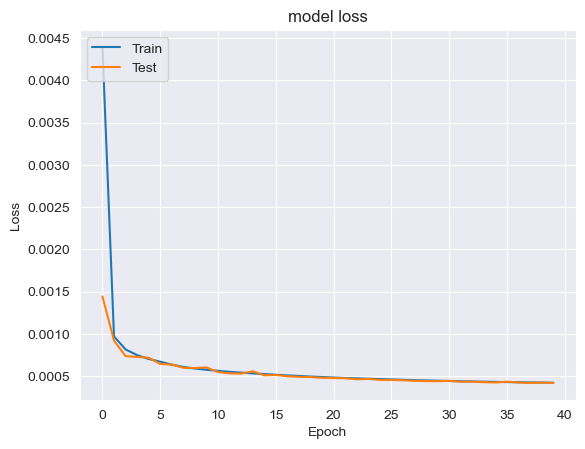

In [97]:
plot_his(history_8)

In [98]:
prediction_8 = model_8.predict(X_test)

6218/6218 [==============================] - 20s 3ms/step


In [99]:
model_8.evaluate(X_test,Y_test)

6218/6218 [==============================] - 26s 4ms/step - loss: 4.2024e-04 - rmse: 6.3618e-04 - mae: 4.2024e-04 - mse: 4.0473e-07 - mape: 74.7421


[0.0004202412674203515,
 0.0006361813866533339,
 0.0004202412674203515,
 4.047267623263906e-07,
 74.74208068847656]

In [100]:
AIC_value(model_8,prediction_8, Y_test)

AIC:  65840.89


# CNN

# Model 9

In [101]:
%%time
model_9 = tf.keras.Sequential([tf.keras.layers.Conv1D(10,3,activation='linear',input_shape=(5,1)),
                               tf.keras.layers.Conv1D(10,3,activation='relu'),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(1)])

model_9.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_9 = model_9.fit(X_train,Y_train,epochs=50,validation_data=(X_test,Y_test),callbacks=callback)

Epoch 1/50
24872/24872 [==============================] - 73s 3ms/step - loss: 0.0020 - rmse: 0.0214 - mae: 0.0020 - mse: 4.5978e-04 - mape: 227.4457 - val_loss: 0.0018 - val_rmse: 0.0018 - val_mae: 0.0018 - val_mse: 3.3035e-06 - val_mape: 226.0684
Epoch 2/50
24872/24872 [==============================] - 69s 3ms/step - loss: 5.1794e-04 - rmse: 6.8085e-04 - mae: 5.1794e-04 - mse: 4.6356e-07 - mape: 85.2838 - val_loss: 2.1348e-04 - val_rmse: 2.3485e-04 - val_mae: 2.1348e-04 - val_mse: 5.5153e-08 - val_mape: 73.3914
Epoch 3/50
24872/24872 [==============================] - 71s 3ms/step - loss: 3.5996e-04 - rmse: 4.7168e-04 - mae: 3.5996e-04 - mse: 2.2248e-07 - mape: 59.7943 - val_loss: 2.0800e-04 - val_rmse: 2.4761e-04 - val_mae: 2.0800e-04 - val_mse: 6.1312e-08 - val_mape: 9.6488
Epoch 4/50
24872/24872 [==============================] - 71s 3ms/step - loss: 2.5023e-04 - rmse: 3.2623e-04 - mae: 2.5023e-04 - mse: 1.0643e-07 - mape: 41.0627 - val_loss: 1.8919e-04 - val_rmse: 2.2256e-04 - v

In [102]:
model_9.evaluate(X_test,Y_test)

6218/6218 [==============================] - 14s 2ms/step - loss: 7.9589e-05 - rmse: 8.4502e-05 - mae: 7.9589e-05 - mse: 7.1405e-09 - mape: 5.9133


[7.958943751873448e-05,
 8.450159657513723e-05,
 7.958943751873448e-05,
 7.140519286963354e-09,
 5.913330554962158]

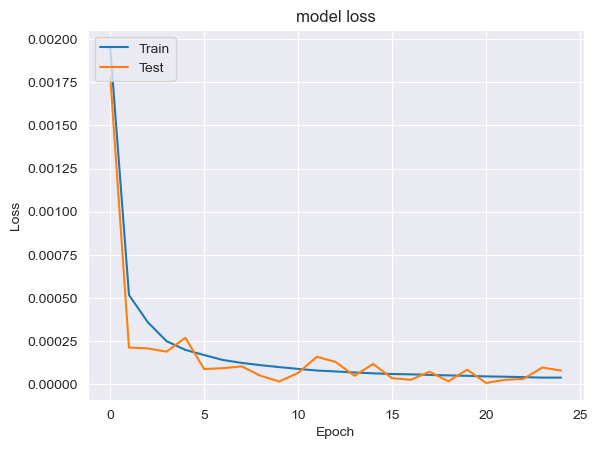

In [103]:
plot_his(history_9)

In [104]:
prediction_9 = model_9.predict(X_test)

6218/6218 [==============================] - 10s 2ms/step


In [105]:
AIC_value(model_9,prediction_9,Y_test)

AIC:  720.887


# Model 10

In [106]:
%%time
model_10 = tf.keras.Sequential([tf.keras.layers.Conv1D(10,2,activation='linear',input_shape=(5,1)),
                               tf.keras.layers.Conv1D(10,3,activation='linear'),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(20),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1,activation='linear')])

model_10.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_10 = model_10.fit(X_train,Y_train,epochs=100,validation_data=(X_test,Y_test),callbacks = callback)

Epoch 1/100
24872/24872 [==============================] - 79s 3ms/step - loss: 0.0030 - rmse: 0.0141 - mae: 0.0030 - mse: 1.9906e-04 - mape: 402.9832 - val_loss: 3.1542e-04 - val_rmse: 3.6108e-04 - val_mae: 3.1542e-04 - val_mse: 1.3038e-07 - val_mape: 83.6494
Epoch 2/100
24872/24872 [==============================] - 76s 3ms/step - loss: 9.4371e-04 - rmse: 0.0012 - mae: 9.4371e-04 - mse: 1.5522e-06 - mape: 129.2899 - val_loss: 9.4660e-04 - val_rmse: 9.9468e-04 - val_mae: 9.4660e-04 - val_mse: 9.8938e-07 - val_mape: 83.5673
Epoch 3/100
24872/24872 [==============================] - 77s 3ms/step - loss: 5.9741e-04 - rmse: 7.8370e-04 - mae: 5.9741e-04 - mse: 6.1418e-07 - mape: 79.6681 - val_loss: 6.3156e-04 - val_rmse: 6.7973e-04 - val_mae: 6.3156e-04 - val_mse: 4.6203e-07 - val_mape: 90.3972
Epoch 4/100
24872/24872 [==============================] - 79s 3ms/step - loss: 4.2802e-04 - rmse: 5.6273e-04 - mae: 4.2802e-04 - mse: 3.1666e-07 - mape: 54.8099 - val_loss: 5.2905e-04 - val_rmse: 5

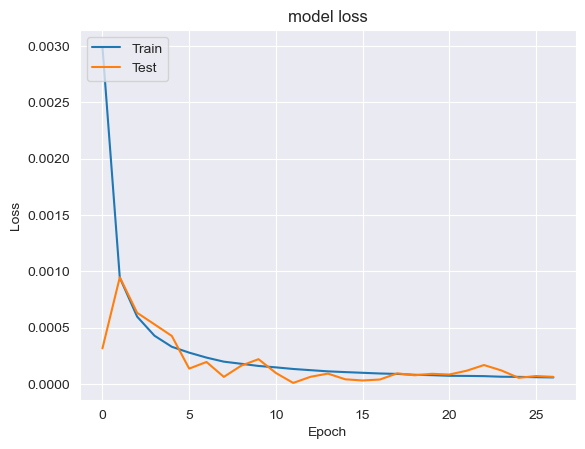

In [107]:
plot_his(history_10)

In [108]:
model_10.evaluate(X_test,Y_test)

6218/6218 [==============================] - 13s 2ms/step - loss: 6.2384e-05 - rmse: 6.4628e-05 - mae: 6.2384e-05 - mse: 4.1768e-09 - mape: 9.9743


[6.238413334358484e-05,
 6.462800229201093e-05,
 6.238413334358484e-05,
 4.1767789227264984e-09,
 9.97432804107666]

In [109]:
prediction_10 = model_10.predict(X_test)

6218/6218 [==============================] - 10s 2ms/step


In [110]:
AIC_value(model_10,prediction_10,Y_test)

AIC:  1960.887


# Model 11

In [111]:
%%time
model_11 = tf.keras.Sequential([tf.keras.layers.Conv1D(32,3,activation='linear',input_shape=(5,1)),
                               tf.keras.layers.Conv1D(32,2,activation='linear'),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(32,activation="linear"),
                               tf.keras.layers.Dense(16,activation="relu"),
                               tf.keras.layers.Dense(1,activation ='linear')])

model_11.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001,decay=0.001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_11 = model_11.fit(X_train,Y_train,epochs=100,validation_data=(X_test,Y_test),callbacks = callback)

Epoch 1/100
24872/24872 [==============================] - 80s 3ms/step - loss: 0.0020 - rmse: 0.0327 - mae: 0.0020 - mse: 0.0011 - mape: 295.9258 - val_loss: 2.9654e-04 - val_rmse: 3.5491e-04 - val_mae: 2.9654e-04 - val_mse: 1.2596e-07 - val_mape: 87.0557
Epoch 2/100
24872/24872 [==============================] - 77s 3ms/step - loss: 2.7335e-04 - rmse: 3.3142e-04 - mae: 2.7335e-04 - mse: 1.0984e-07 - mape: 86.1578 - val_loss: 2.4505e-04 - val_rmse: 2.9272e-04 - val_mae: 2.4505e-04 - val_mse: 8.5683e-08 - val_mape: 50.8321
Epoch 3/100
24872/24872 [==============================] - 77s 3ms/step - loss: 2.3215e-04 - rmse: 2.8055e-04 - mae: 2.3215e-04 - mse: 7.8706e-08 - mape: 74.6278 - val_loss: 2.1177e-04 - val_rmse: 2.5540e-04 - val_mae: 2.1177e-04 - val_mse: 6.5230e-08 - val_mape: 62.2167
Epoch 4/100
24872/24872 [==============================] - 77s 3ms/step - loss: 2.0527e-04 - rmse: 2.4755e-04 - mae: 2.0527e-04 - mse: 6.1282e-08 - mape: 65.7564 - val_loss: 1.9516e-04 - val_rmse: 2.

24872/24872 [==============================] - 78s 3ms/step - loss: 2.1030e-05 - rmse: 2.5622e-05 - mae: 2.1030e-05 - mse: 6.5649e-10 - mape: 6.7510 - val_loss: 1.9830e-05 - val_rmse: 2.4418e-05 - val_mae: 1.9830e-05 - val_mse: 5.9626e-10 - val_mape: 5.8490
Epoch 32/100
24872/24872 [==============================] - 78s 3ms/step - loss: 1.8434e-05 - rmse: 2.2531e-05 - mae: 1.8434e-05 - mse: 5.0767e-10 - mape: 5.8974 - val_loss: 1.9142e-05 - val_rmse: 2.3651e-05 - val_mae: 1.9142e-05 - val_mse: 5.5939e-10 - val_mape: 3.8319
Epoch 33/100
24872/24872 [==============================] - 78s 3ms/step - loss: 1.5974e-05 - rmse: 1.9610e-05 - mae: 1.5974e-05 - mse: 3.8454e-10 - mape: 5.0874 - val_loss: 1.4210e-05 - val_rmse: 1.7452e-05 - val_mae: 1.4210e-05 - val_mse: 3.0458e-10 - val_mape: 4.0033
Epoch 34/100
24872/24872 [==============================] - 79s 3ms/step - loss: 1.3689e-05 - rmse: 1.6908e-05 - mae: 1.3689e-05 - mse: 2.8590e-10 - mape: 4.3105 - val_loss: 1.2939e-05 - val_rmse: 1.6

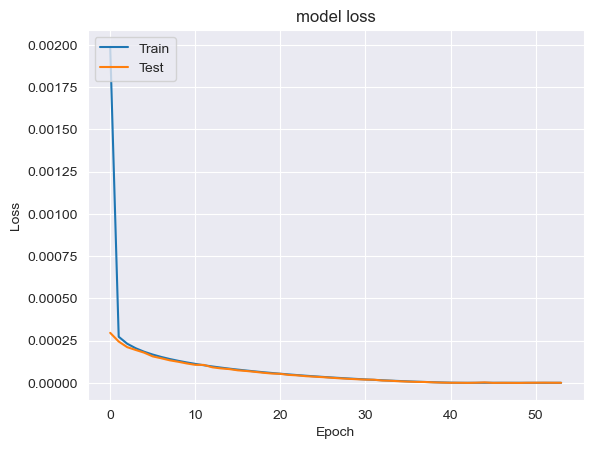

In [112]:
plot_his(history_11)

In [113]:
model_11.evaluate(X_test,Y_test)

6218/6218 [==============================] - 13s 2ms/step - loss: 1.0777e-06 - rmse: 3.2400e-06 - mae: 1.0777e-06 - mse: 1.0498e-11 - mape: 0.1527


[1.0776807357615326e-06,
 3.2400039344793186e-06,
 1.0776807357615326e-06,
 1.0497625338445893e-11,
 0.15270879864692688]

In [114]:
prediction_11 = model_11.predict(X_test)

6218/6218 [==============================] - 11s 2ms/step


In [115]:
AIC_value(model_11,prediction_11,Y_test)

AIC:  9664.887


# Model 12

In [116]:
%%time
model_12 = tf.keras.Sequential([tf.keras.layers.Conv1D(32,3,activation='linear',input_shape=(5,1)),
                               tf.keras.layers.Conv1D(8,2,activation='linear'),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(5),
                               tf.keras.layers.Dense(1,activation = 'linear')])

model_12.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_12 = model_12.fit(X_train,Y_train,epochs=100,validation_data=(X_test,Y_test))

Epoch 1/100
24872/24872 [==============================] - 78s 3ms/step - loss: 0.0021 - rmse: 0.0060 - mae: 0.0021 - mse: 3.5484e-05 - mape: 313.7585 - val_loss: 3.1311e-04 - val_rmse: 3.7135e-04 - val_mae: 3.1311e-04 - val_mse: 1.3790e-07 - val_mape: 57.5237
Epoch 2/100
24872/24872 [==============================] - 77s 3ms/step - loss: 6.4329e-04 - rmse: 8.3813e-04 - mae: 6.4329e-04 - mse: 7.0246e-07 - mape: 101.1799 - val_loss: 4.1179e-04 - val_rmse: 4.8452e-04 - val_mae: 4.1179e-04 - val_mse: 2.3476e-07 - val_mape: 28.4370
Epoch 3/100
24872/24872 [==============================] - 77s 3ms/step - loss: 3.9826e-04 - rmse: 5.1293e-04 - mae: 3.9826e-04 - mse: 2.6310e-07 - mape: 66.5854 - val_loss: 1.6858e-04 - val_rmse: 1.8675e-04 - val_mae: 1.6858e-04 - val_mse: 3.4876e-08 - val_mape: 43.9206
Epoch 4/100
24872/24872 [==============================] - 76s 3ms/step - loss: 2.8971e-04 - rmse: 3.7335e-04 - mae: 2.8971e-04 - mse: 1.3939e-07 - mape: 49.4204 - val_loss: 4.6091e-04 - val_rms

24872/24872 [==============================] - 87s 3ms/step - loss: 3.5888e-05 - rmse: 4.6292e-05 - mae: 3.5888e-05 - mse: 2.1429e-09 - mape: 5.9183 - val_loss: 4.8059e-05 - val_rmse: 5.6550e-05 - val_mae: 4.8059e-05 - val_mse: 3.1979e-09 - val_mape: 1.6193
Epoch 32/100
24872/24872 [==============================] - 87s 4ms/step - loss: 3.3568e-05 - rmse: 4.3124e-05 - mae: 3.3568e-05 - mse: 1.8597e-09 - mape: 5.3254 - val_loss: 5.0128e-05 - val_rmse: 5.1182e-05 - val_mae: 5.0128e-05 - val_mse: 2.6196e-09 - val_mape: 7.7457
Epoch 33/100
24872/24872 [==============================] - 87s 4ms/step - loss: 3.3214e-05 - rmse: 4.2736e-05 - mae: 3.3214e-05 - mse: 1.8264e-09 - mape: 5.4676 - val_loss: 1.5108e-05 - val_rmse: 1.8663e-05 - val_mae: 1.5108e-05 - val_mse: 3.4829e-10 - val_mape: 0.7527
Epoch 34/100
24872/24872 [==============================] - 89s 4ms/step - loss: 3.2682e-05 - rmse: 4.2022e-05 - mae: 3.2682e-05 - mse: 1.7658e-09 - mape: 5.2288 - val_loss: 4.9090e-05 - val_rmse: 5.2

24872/24872 [==============================] - 74s 3ms/step - loss: 1.7744e-05 - rmse: 2.2763e-05 - mae: 1.7744e-05 - mse: 5.1817e-10 - mape: 2.9245 - val_loss: 1.5924e-05 - val_rmse: 1.6274e-05 - val_mae: 1.5924e-05 - val_mse: 2.6486e-10 - val_mape: 4.2475
Epoch 62/100
24872/24872 [==============================] - 74s 3ms/step - loss: 1.7885e-05 - rmse: 2.2967e-05 - mae: 1.7885e-05 - mse: 5.2747e-10 - mape: 2.9030 - val_loss: 1.4225e-05 - val_rmse: 1.5183e-05 - val_mae: 1.4225e-05 - val_mse: 2.3053e-10 - val_mape: 1.4172
Epoch 63/100
24872/24872 [==============================] - 74s 3ms/step - loss: 1.7292e-05 - rmse: 2.2272e-05 - mae: 1.7292e-05 - mse: 4.9602e-10 - mape: 2.7999 - val_loss: 1.6354e-05 - val_rmse: 1.6750e-05 - val_mae: 1.6354e-05 - val_mse: 2.8055e-10 - val_mape: 2.1735
Epoch 64/100
24872/24872 [==============================] - 75s 3ms/step - loss: 1.7083e-05 - rmse: 2.1973e-05 - mae: 1.7083e-05 - mse: 4.8283e-10 - mape: 2.7699 - val_loss: 3.9015e-05 - val_rmse: 4.0

24872/24872 [==============================] - 74s 3ms/step - loss: 1.2043e-05 - rmse: 1.5515e-05 - mae: 1.2043e-05 - mse: 2.4072e-10 - mape: 1.9702 - val_loss: 4.1500e-06 - val_rmse: 4.8517e-06 - val_mae: 4.1500e-06 - val_mse: 2.3539e-11 - val_mape: 1.2952
Epoch 92/100
24872/24872 [==============================] - 75s 3ms/step - loss: 1.1798e-05 - rmse: 1.5170e-05 - mae: 1.1798e-05 - mse: 2.3013e-10 - mape: 1.9459 - val_loss: 1.4873e-05 - val_rmse: 1.6405e-05 - val_mae: 1.4873e-05 - val_mse: 2.6914e-10 - val_mape: 2.7006
Epoch 93/100
24872/24872 [==============================] - 76s 3ms/step - loss: 1.1555e-05 - rmse: 1.4784e-05 - mae: 1.1555e-05 - mse: 2.1858e-10 - mape: 1.9827 - val_loss: 5.2635e-06 - val_rmse: 6.4646e-06 - val_mae: 5.2635e-06 - val_mse: 4.1791e-11 - val_mape: 1.5344
Epoch 94/100
24872/24872 [==============================] - 76s 3ms/step - loss: 1.1573e-05 - rmse: 1.4818e-05 - mae: 1.1573e-05 - mse: 2.1956e-10 - mape: 1.8892 - val_loss: 1.0866e-05 - val_rmse: 1.1

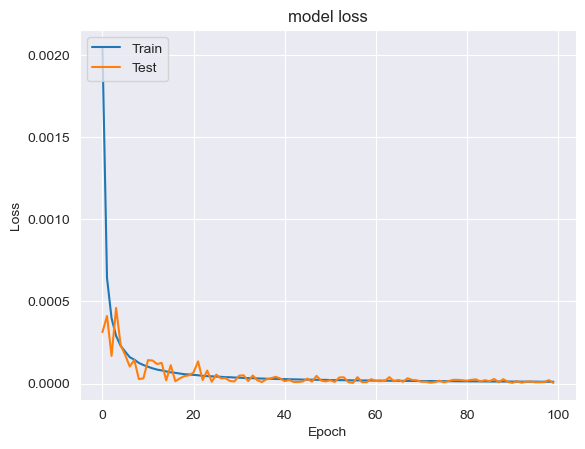

In [117]:
plot_his(history_12)

In [118]:
model_12.evaluate(X_test,Y_test)

6218/6218 [==============================] - 13s 2ms/step - loss: 3.7552e-06 - rmse: 4.0964e-06 - mae: 3.7552e-06 - mse: 1.6780e-11 - mape: 0.9673


[3.7551531022472773e-06,
 4.096393695363076e-06,
 3.7551531022472773e-06,
 1.678043988484479e-11,
 0.9673245549201965]

In [119]:
prediction_12 = model_12.predict(X_test)

6218/6218 [==============================] - 10s 2ms/step


In [120]:
AIC_value(model_11,prediction_11,Y_test)

AIC:  9664.887


# Results and Discussions

In [121]:
# AIC_value(model_1,Y_pred_1,Y_test)
# AIC_value(model_2,Y_pred_2,Y_test)
# AIC_value(model_3,Y_pred_3,Y_test)
# AIC_value(model_4,Y_pred_4,Y_test)
# AIC_value(model_5,prediction_5,Y_test)
# AIC_value(model_6,prediction_6,Y_test)
# AIC_value(model_7,prediction_7[:198976],Y_test)
# AIC_value(model_8,prediction_8,Y_test)
# AIC_value(model_9,prediction_9,Y_test)
# AIC_value(model_10,prediction_10,Y_test)
# AIC_value(model_11,prediction_11,Y_test)
# AIC_value(model_12,prediction_12,Y_test)


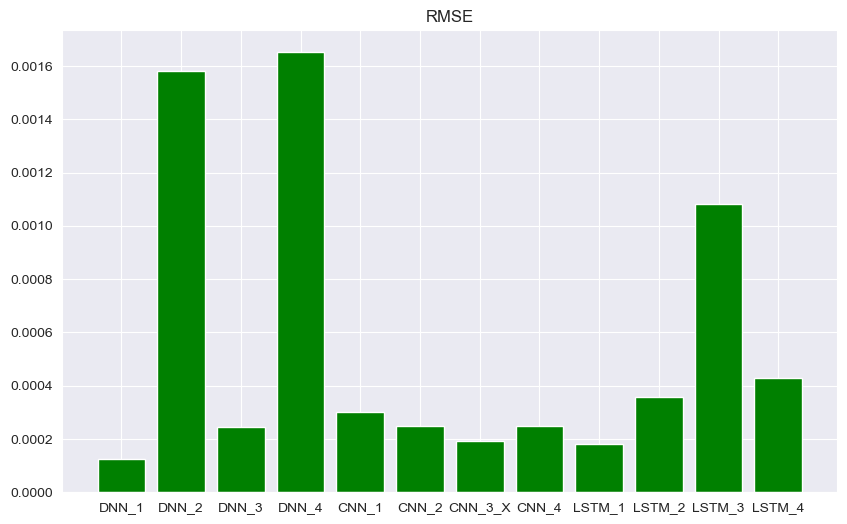

In [122]:
rmse_score = { 'DNN_1':0.000124903,'DNN_2':0.001580797,'DNN_3':0.00024606,'DNN_4':0.00165169,'CNN_1':0.00030274,
              'CNN_2':0.00024752,'CNN_3_X':0.0001937482,'CNN_4':0.00024752,'LSTM_1':0.0001818,
             'LSTM_2':0.000358092, 'LSTM_3':0.00108152, 'LSTM_4':0.000430131 }
names = list(rmse_score.keys())
values = list(rmse_score.values())


plt.figure(figsize=(10,6))
plt.bar(range(len(rmse_score)), values, tick_label=names,color='green')

plt.title('RMSE')
plt.show()

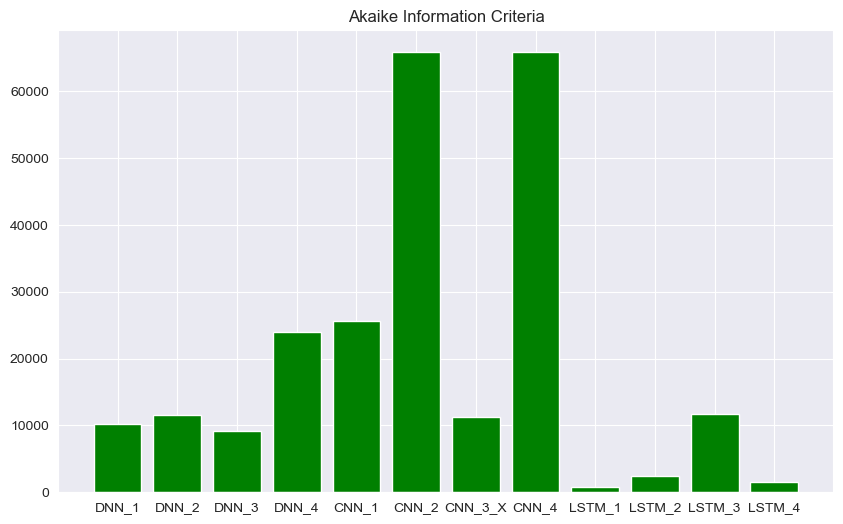

In [123]:
AIC_score = { 'DNN_1':10161.582,'DNN_2':11601.582,'DNN_3':9121.582,'DNN_4':23941.582,'CNN_1':25701.582,
              'CNN_2':65841.58,'CNN_3_X':11200.341,'CNN_4':65841.586,'LSTM_1':741.5822,
             'LSTM_2':2361.582, 'LSTM_3':11713.582, 'LSTM_4':1557.5822 }
names = list(AIC_score.keys())
values = list(AIC_score.values())


plt.figure(figsize=(10,6))
plt.bar(range(len(AIC_score)), values, tick_label=names,color='green')

plt.title('Akaike Information Criteria')
plt.show()

In [124]:
model_1.save('Nornalized_modals/model_1_SOCesti.h5')

In [125]:
model_2.save('Nornalized_modals/model_2_SOCesti.h5')

In [126]:
model_3.save('Nornalized_modals/model_3_SOCesti.h5')

In [127]:
model_4.save('Nornalized_modals/model_4_SOCesti.h5')

In [128]:
model_5.save('Nornalized_modals/model_5_SOCesti.h5')

In [129]:
model_6.save('Nornalized_modals/model_6_SOCesti.h5')

In [130]:
model_7.save('Nornalized_modals/model_7_SOCesti.h5')

In [131]:
model_8.save('Nornalized_modals/model_8_SOCesti.h5')

In [132]:
model_9.save('Nornalized_modals/model_9_SOCesti.h5')

In [133]:
model_10.save('Nornalized_modals/model_10_SOCesti.h5')

In [134]:
model_11.save('Nornalized_modals/model_11_SOCesti.h5')

In [135]:
model_12.save('Nornalized_modals/model_12_SOCesti.h5')

Text(0.5, 1.0, 'Real Vs Predicted')

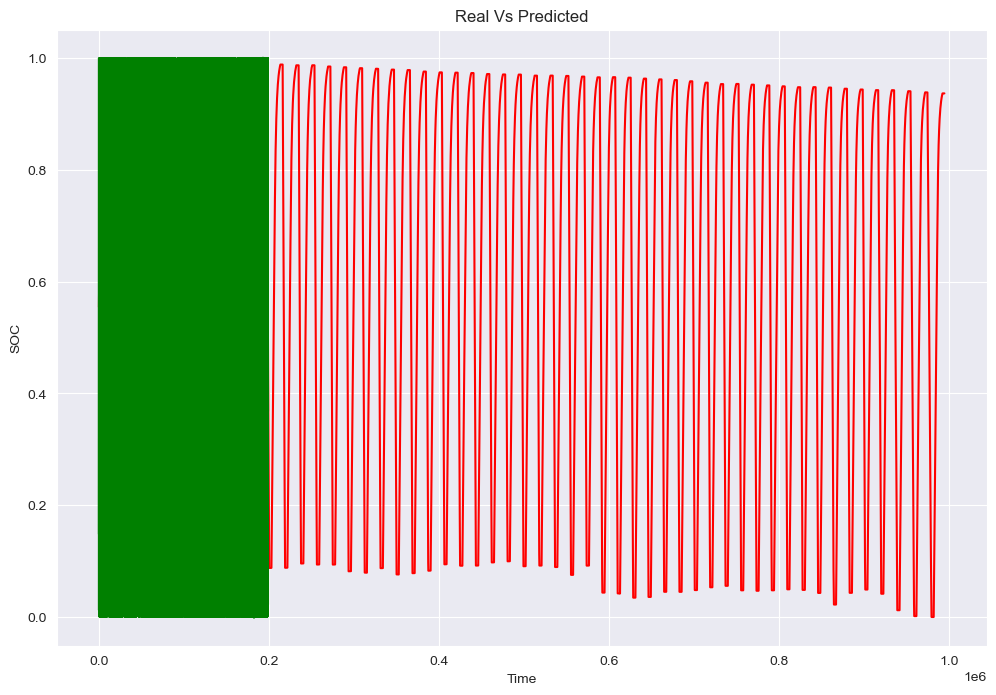

In [136]:
sns.set_style("darkgrid")
plt.figure(figsize=(12, 8))
plt.plot(Y,color='r')
plt.plot(prediction_7,color='g')
plt.ylabel('SOC')
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('Time')
plt.title('Real Vs Predicted')